<IPython.core.display.Javascript object>


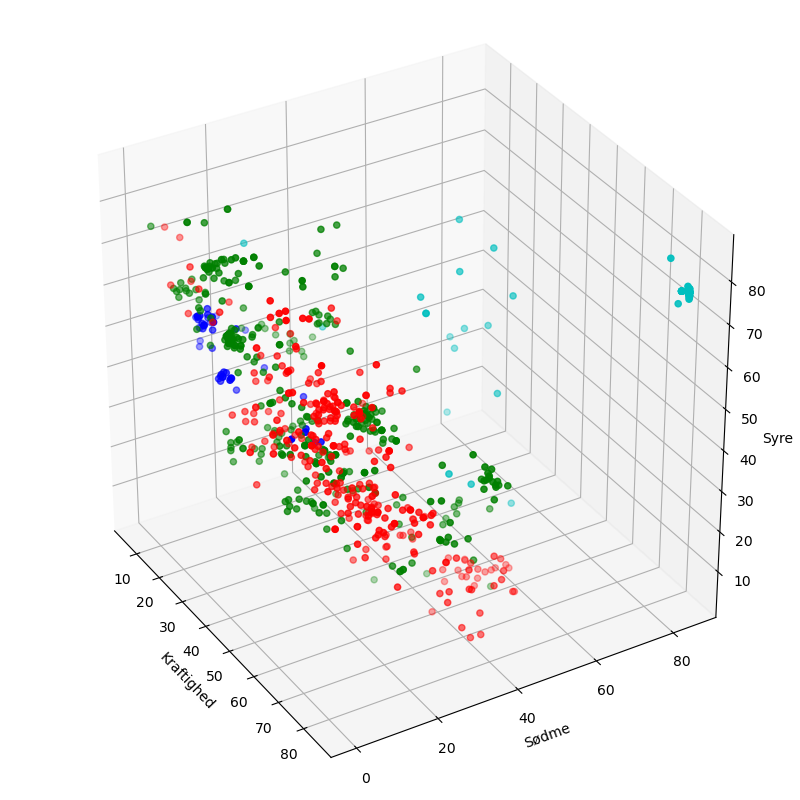

In [100]:
%matplotlib notebook

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
import matplotlib.cm as cm
import itertools
import pandas as pd

df = pd.read_csv('RedWineWithNotes.csv')#[0:150]
dfRose = pd.read_csv('RoseWineWithNotes.csv')
dfDessert = pd.read_csv('DessertWineWithNotes.csv')
dfWhite = pd.read_csv('WhiteWineWithNotes.csv')#[0:150]

temp = df.append(dfRose, ignore_index=True)
tempappended = temp.append(dfDessert, ignore_index=True)
appended = tempappended.append(dfWhite, ignore_index=True)                      
filt = appended['Boldness'] > 0
appended= appended[filt]

fig = pyplot.figure(figsize=(8,8))
ax = Axes3D(fig)

colors = "rbcgm"
types = appended.Winetype.unique()

for wine_type, c in zip(types, colors):
    mask = appended['Winetype'] == wine_type
    sequence_x = appended[mask]['Boldness']
    sequence_y = appended[mask]['Sweetness']
    sequence_z = appended[mask]['Acidity']
    ax.scatter(sequence_x, sequence_y, sequence_z, color=c)
    
ax.set_xlabel('Kraftighed')
ax.set_ylabel('Sødme')
ax.set_zlabel('Syre')
pyplot.show()


<IPython.core.display.Javascript object>


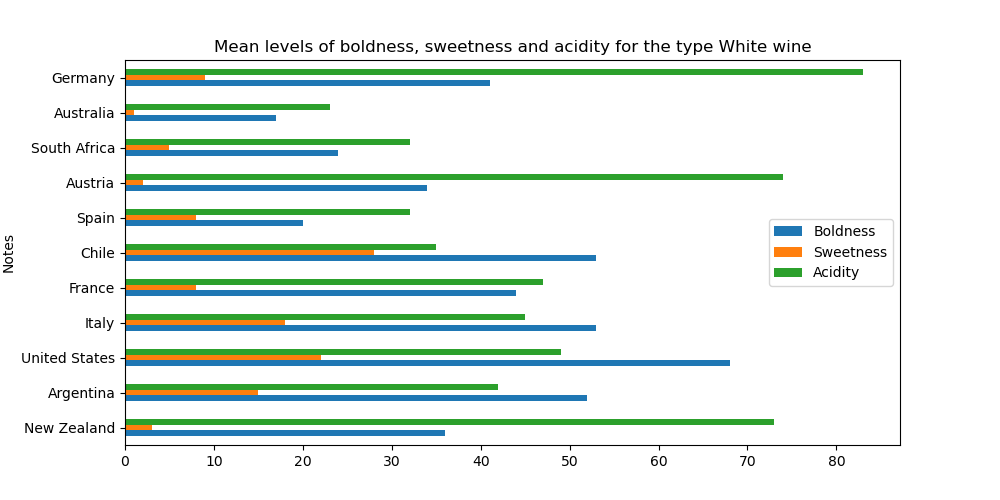

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_notes(df):
    
    df.dropna()
    counts = df['Country'].value_counts()
    df = df[df.isin(counts.index[counts >= 5]).values]

    countries = df.Country.unique()
    plotdata = pd.DataFrame(0, index=df.Country.unique(), columns=['Boldness', 'Sweetness', 'Acidity'])
    loop = 0
    
    for c in countries:
        mask = df['Country'] == c
        plotdata['Boldness'][loop] = df[mask]['Boldness'].mean()
        plotdata['Sweetness'][loop] = df[mask]['Sweetness'].mean()
        plotdata['Acidity'][loop] = df[mask]['Acidity'].mean()
        loop += 1

    mask = plotdata['Boldness'] > 0
    plotdata = plotdata[mask]
    plotdata.plot(kind="barh", figsize=(10,5))
    plt.title("Mean levels of boldness, sweetness and acidity for the type " + str(df.Winetype.unique()[0]))
    plt.ylabel("Notes")

df = pd.read_csv('WhiteWineWithNotes.csv')
plot_notes(df)

<IPython.core.display.Javascript object>


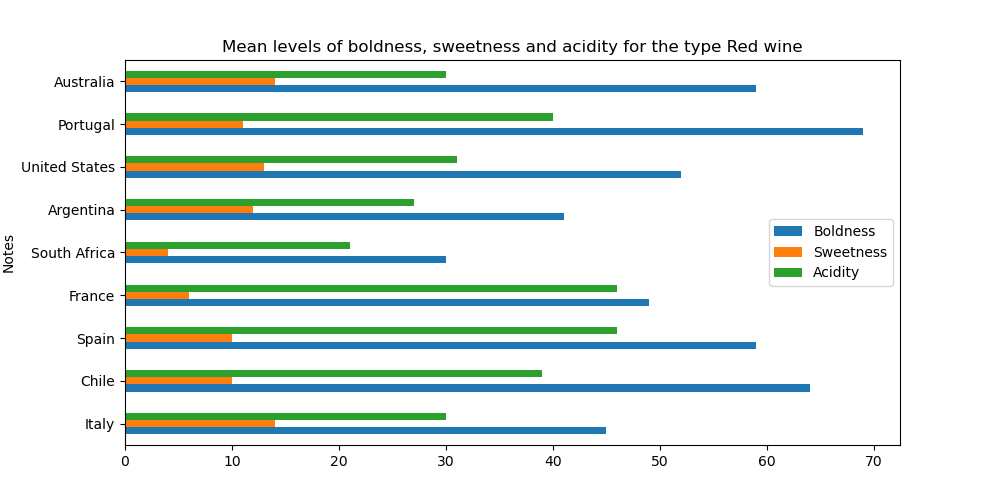

In [98]:
#df.groupby('Country')['Acidity'].describe()

df = pd.read_csv('RedWineWithNotes.csv')
plot_notes(df)